# Homework III - Report

Cecília Correia, 106827
<br>Patrícia Gameiro, 107245

## Programming and critical analysis [8v]

**Consider the `parkinsons.csv` dataset (available at the course’s webpage), where the goal is
to predict a patient’s score on the Unified Parkinson’s Disease Rating Scale based on various
biomedical measurements.**

**To answer question 5), average the performance of the models over 10 separate runs. In each run, use a diﬀerent 80-20 train-test split by setting a `random_state=i`, with `i=1..10`.**

### 5) [2v]
**Train a Linear Regression model, an MLP Regressor with 2 hidden layers of 10
neurons each and no activation functions, and another MLP Regressor with 2 hidden
layers of 10 neurons each using ReLU activation functions. (Use `random_state=0` on the MLPs, regardless of the run). Plot a boxplot of the test MAE of each model.**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/parkinsons.csv")

X = df.drop("target", axis = 1)
y = df["target"]

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

c:\Users\Patrícia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Patrícia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Patrícia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Patrícia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

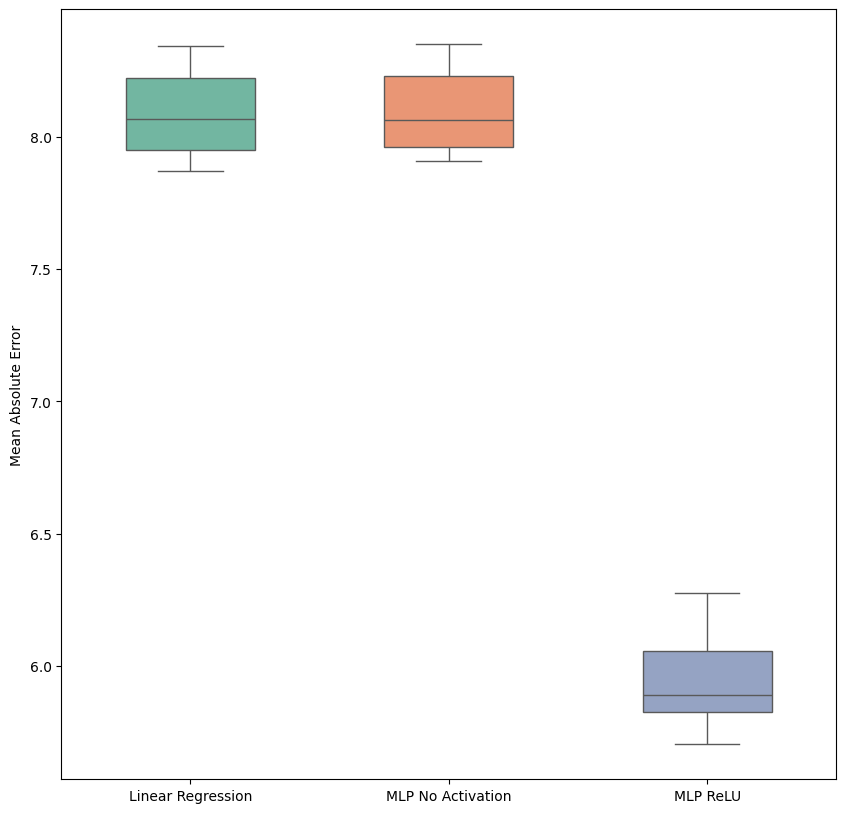

In [3]:
random_seeds = range(1, 11)

results = {"Linear Regression": [], "MLP No Activation": [], "MLP ReLU": []}

for i in random_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    results["Linear Regression"].append(mean_absolute_error(y_test, y_pred_lr))

    mlp_no_act = MLPRegressor(hidden_layer_sizes = (10, 10), activation ="identity", random_state = 0)
    mlp_no_act.fit(X_train, y_train)
    y_pred_mlp_no_act = mlp_no_act.predict(X_test)
    results["MLP No Activation"].append(mean_absolute_error(y_test, y_pred_mlp_no_act))

    mlp_relu = MLPRegressor(hidden_layer_sizes = (10, 10), activation = "relu", random_state = 0)
    mlp_relu.fit(X_train, y_train)
    y_pred_mlp_relu = mlp_relu.predict(X_test)
    results["MLP ReLU"].append(mean_absolute_error(y_test, y_pred_mlp_relu))

results_df = pd.DataFrame(results)

plt.figure(figsize = (10, 10))

sns.boxplot(data = results_df, palette = "Set2", width = 0.5)
plt.ylabel('Mean Absolute Error')

plt.show()

### 6) [3v]
**Compare a Linear Regression with a MLP with no activations, and explain the impact
and the importance of using activation functions in a MLP . Support your reasoning with the
results from the boxplots.**

BLA BLA BLA FIXME

### 7) [3v]
**Using a 80-20 train-test split with `random_state=0`, use a Grid Search to tune the hyperparameters of an MLP regressor with two hidden layers (size 10 each). The parameters to search over are: (i) L2 penalty, with the values `{0.0001, 0.001, 0.01}`; (ii) learning rate, with the values `{0.001, 0.01, 0.1}`; and (iii) batch size, with the values `{32, 64, 128}`. Plot the test MAE for each combination of hyperparameters, report the best combination, and discuss the trade-oﬀs between the combinations.**

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [5]:
mlp = MLPRegressor(hidden_layer_sizes = (10, 10), random_state = 0)

param_grid = {
    "alpha": [0.0001, 0.001, 0.01],  
    "learning_rate_init": [0.001, 0.01, 0.1],  
    "batch_size": [32, 64, 128]  
}

grid_search = GridSearchCV(mlp, param_grid, scoring = "neg_mean_absolute_error")
grid_search.fit(X_train, y_train)

results = grid_search.cv_results_

alphas = results["param_alpha"].data
learning_rates = results["param_learning_rate_init"].data
batch_sizes = results["param_batch_size"].data
mean_absolute_errors = -results["mean_test_score"]

c:\Users\Patrícia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Patrícia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Patrícia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Patrícia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

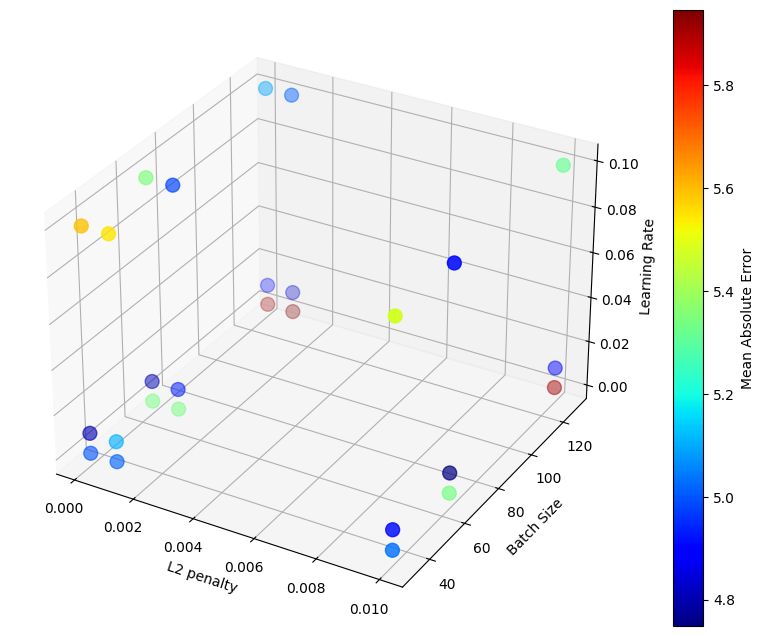

Best parameters found:  {'alpha': 0.01, 'batch_size': 64, 'learning_rate_init': 0.01}


In [8]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = "3d")

sc = ax.scatter(alphas, batch_sizes, learning_rates, c = mean_absolute_errors, cmap = cm.jet, s = 100)

ax.set_xlabel("L2 penalty")
ax.set_ylabel("Batch Size")
ax.set_zlabel("Learning Rate")

cbar = plt.colorbar(sc, ax=ax, label = "Mean Absolute Error")

plt.show()

# Mostrar a melhor combinação de hiperparâmetros
print("Best parameters found: ", grid_search.best_params_)